In [27]:
include("../src/beam/beam.jl")
include("../src/beam/beam2alm.jl")
using Healpix
using Statistics
using Pkg 
ENV["PYTHON"] = "/home/wang/anaconda3/envs/fslcomsep/bin/python"
Pkg.build("PyCall")
using PyCall
using PyPlot
hp = pyimport("healpy")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`


PyObject <module 'healpy' from '/home/wang/anaconda3/envs/fslcomsep/lib/python3.10/site-packages/healpy/__init__.py'>

In [28]:
beam = bm_grid_read("pix0000_100_pp_f2p2_v4_mft_tp.grd")

bmgrid{String, Int64, Float64, Array{Complex, 3}}("\nVERSION: TICRA-EM-FIELD-V0.1\nField data in grid\nSOURCE_FIELD_NAME: baffle_aperture.po\nFREQUENCY_NAME: freq\nFREQUENCIES [GHz]:\n  0.1000000000E+03", 2, 1001, 1001, 3, 7, 0, 0, 0.0, 0.0, 360.0, 90.0, [111.7295057 + 232.9208054im 111.7295057 + 232.9208054im … 111.7295057 + 232.9208054im 111.7295057 + 232.9208054im; 0.08855609491 + 0.02654065976im 0.08855609491 + 0.02654065976im … 0.08855609491 + 0.02654065976im 0.08855609491 + 0.02654065976im;;; 109.3296993 + 227.5352333im 109.3286435 + 227.5327789im … 109.3307496 + 227.5376719im 109.3296993 + 227.5352333im; 0.08048518679 + 0.03991321101im 0.08034212534 + 0.03986885038im … 0.08062847931 + 0.03995720087im 0.08048518679 + 0.03991321101im;;; 101.9725624 + 211.2242483im 101.9705563 + 211.2195717im … 101.9745634 + 211.2288994im 101.9725624 + 211.2242483im; 0.06248002148 + 0.07286445112im 0.06190805942 + 0.07271147101im … 0.06305270131 + 0.07301620212im 0.06248002148 + 0.07286445112im;;; 

In [29]:
beam_p = bm_grid2polar(beam, copol = "x")
beam_p = bm_polar_normalise(beam_p, "four_pi")

bmpolar{Int64, Float64, Array{Float64, 3}}(1000, 1001, 0.0, 1.5707963267948966, [2655.3248597683028 2655.3248597683028 … 2655.3248597683028 2655.3248597683028; -2655.3241796523944 -2655.3241796523944 … -2655.3241796523944 -2655.3241796523944; -1.2793033924841768 -1.2793033924841768 … -1.2793033924841768 -1.2793033924841768; 1.4054322202942604 1.4054322202942604 … 1.4054322202942604 1.4054322202942604;;; 2535.5480738418933 2535.4944463866727 … 2535.654332182735 2535.6013679272382; -2535.5474315777146 -2535.4938062350666 … -2535.6536856812127 -2535.6007235463085; -1.4229313775240235 -1.42086895618345 … -1.427041640647815 -1.4249890515889434; 1.1100672440534525 1.1078504795556987 … 1.1145225467644222 1.112291382845916;;; 2188.941320194731 2188.846431043849 … 2189.1296913653478 2189.0357414136492; -2188.940587048972 -2188.8457053318575 … -2189.1289432070353 -2189.035000785412; -1.7317638857372264 -1.7245142362869215 … -1.7462178738025322 -1.7389988223395878; 0.45893288995591197 0.450548915

In [30]:
tmp = beam_p.stokes
tmp[2,:,:] = tmp[1,:,:] * 1
tmp[3,:,:] .= 0
# tmp[1,:,:] .= 0
test_beam = bmpolar(beam_p.nphi, beam_p.ntheta, beam_p.theta_min, beam_p.theta_max, tmp)

bmpolar{Int64, Float64, Array{Float64, 3}}(1000, 1001, 0.0, 1.5707963267948966, [2655.3248597683028 2655.3248597683028 … 2655.3248597683028 2655.3248597683028; 2655.3248597683028 2655.3248597683028 … 2655.3248597683028 2655.3248597683028; 0.0 0.0 … 0.0 0.0; 1.4054322202942604 1.4054322202942604 … 1.4054322202942604 1.4054322202942604;;; 2535.5480738418933 2535.4944463866727 … 2535.654332182735 2535.6013679272382; 2535.5480738418933 2535.4944463866727 … 2535.654332182735 2535.6013679272382; 0.0 0.0 … 0.0 0.0; 1.1100672440534525 1.1078504795556987 … 1.1145225467644222 1.112291382845916;;; 2188.941320194731 2188.846431043849 … 2189.1296913653478 2189.0357414136492; 2188.941320194731 2188.846431043849 … 2189.1296913653478 2189.0357414136492; 0.0 0.0 … 0.0 0.0; 0.45893288995591197 0.450548915111577 … 0.4757664645817359 0.4673391824752072;;; … ;;; 1.0819225968392944e-6 4.034944276717603e-6 … 3.102576615054944e-6 3.6515646233941554e-6; 1.0819225968392944e-6 4.034944276717603e-6 … 3.1025766150

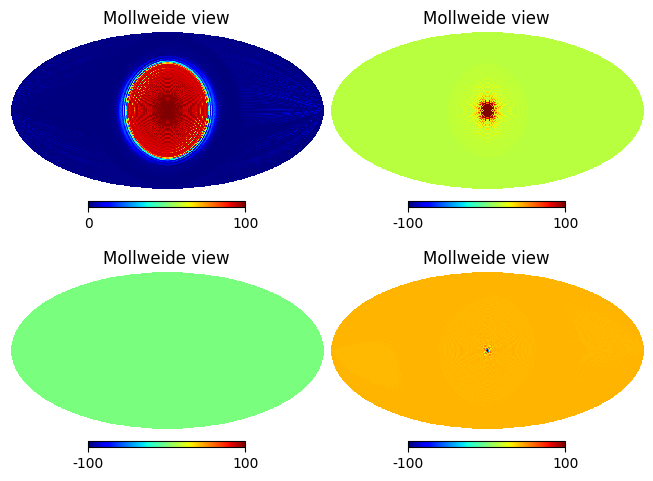

In [31]:
nside = 256
beam_map = HealpixMap{Float64, RingOrder}(nside)
beam_map.pixels[:] .= UNSEEN
resol = Resolution(256)
for i in 1:nside2npix(nside)
    theta, phi = pix2angRing(resol, i)
    beam_map.pixels[i] = bm_polar_get_value(beam_p, theta, phi, 1)
end
hp.mollview(beam_map.pixels/mean(beam_map.pixels), min = 0, max = 100, rot = (0, 90 ,0),sub = (2, 2, 1), norm = "hist", cmap = "jet")

beam_map.pixels[:] .= UNSEEN
for i in 1:nside2npix(nside)
    theta, phi = pix2angRing(resol, i)
    beam_map.pixels[i] = bm_polar_get_value(beam_p, theta, phi, 2)
end
hp.mollview((beam_map.pixels), min = -100, max = 100, rot = (0, 90 ,0),sub = (2, 2, 2), norm = "hist", cmap = "jet")

beam_map.pixels[:] .= UNSEEN
for i in 1:nside2npix(nside)
    theta, phi = pix2angRing(resol, i)
    beam_map.pixels[i] = bm_polar_get_value(beam_p, theta, phi, 3)
end
hp.mollview((beam_map.pixels), min = -100, max = 100, rot = (0, 90 ,0),sub = (2, 2, 3), norm = "hist", cmap = "jet")

beam_map.pixels[:] .= UNSEEN
for i in 1:nside2npix(nside)
    theta, phi = pix2angRing(resol, i)
    beam_map.pixels[i] = bm_polar_get_value(beam_p, theta, phi, 4)
end
hp.mollview((beam_map.pixels), min = -100, max = 100, rot = (0, 90 ,0),sub = (2, 2, 4), norm = "hist", cmap = "jet")

In [32]:
args = 
Dict(
"beam_main_file_polar" => test_beam ,
"beam_nphi"=>1000   ,
"beam_ntheta"=>1001   ,
"beam_lmax"=>1024  ,
"beam_mmax"=>1024,
"beam_healpix_output" => true,
"beam_nside" => 256
)

Dict{String, Any} with 7 entries:
  "beam_nside"           => 256
  "beam_main_file_polar" => bmpolar{Int64, Float64, Array{Float64, 3}}(1000, 10…
  "beam_lmax"            => 1024
  "beam_mmax"            => 1024
  "beam_nphi"            => 1000
  "beam_healpix_output"  => true
  "beam_ntheta"          => 1001

In [33]:
beammap, alm = beam2alm(args)

Calculating multipoles up to lmax = 1024, mmax = 1024


(PolarizedHealpixMap{Float64, RingOrder, Vector{Float64}}([2159.9725007169245, 2139.330338735527, 2159.9162635139114, 2181.152645871731, 1133.4246076756535, 1116.8933905208978, 1104.2267641533385, 1102.564437566525, 1115.1595318219936, 1135.06024108871  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-3.823865285158613e-13, 3.929886077476929e-13, -6.594905207126376e-13, 9.348995621765083e-13, -801.4366944669963, 789.7470313269355, 780.7909807066738, -779.6155014264525, -788.5209797061833, 802.5932979034072  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2159.9725007169245, -2139.330338735527, 2159.9162635139114, -2181.152645871731, 801.4361176737386, 789.7475707859696, -780.7906602012135, -779.6153010817237, 788.521624320791, 802.5926035338391  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Alm{ComplexF64, Vector{ComplexF64}}[Alm{ComplexF64, Vector{ComplexF64}}(ComplexF64[0.10111427988083395 + 0.0im, 0.17511129095451386 + 0.0im, 0.2256691773520207 + 0.0im, 0.2667

In [34]:
# maps = alm2map(alm, 256)
# hp.mollview(maps.i.pixels/mean(maps.i.pixels), min = 0.5, max = 1, rot = (0, 90 ,0),sub = (2, 2, 1), norm = "hist", cmap = "jet")
# hp.mollview((maps.q.pixels), min = -100, max = 100, rot = (0, 90 ,0),sub = (2, 2, 2), norm = "hist", cmap = "jet")
# hp.mollview((maps.u.pixels), min = -100, max = 100, rot = (0, 90 ,0),sub = (2, 2, 3), norm = "hist", cmap = "jet")

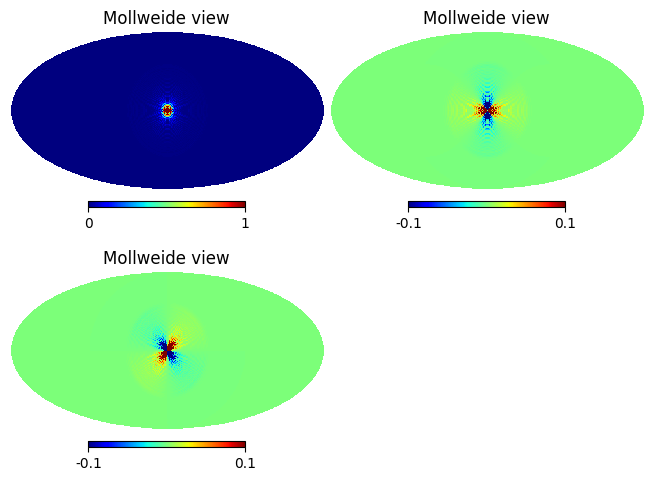

In [63]:
hp.mollview(beammap.i.pixels/maximum(alm2cl(alm[1]))^0.5, min = 0, max = 1, rot = (0, 90 ,0),sub = (2, 2, 1), cmap = "jet")
hp.mollview((beammap.q.pixels)/maximum(alm2cl(alm[1]))^0.5, min = -0.1, max = 0.1, rot = (0, 90 ,0),sub = (2, 2, 2), cmap = "jet")
hp.mollview((beammap.u.pixels)/maximum(alm2cl(alm[1]))^0.5, min = -0.1, max = 0.1, rot = (0, 90 ,0),sub = (2, 2, 3), cmap = "jet")

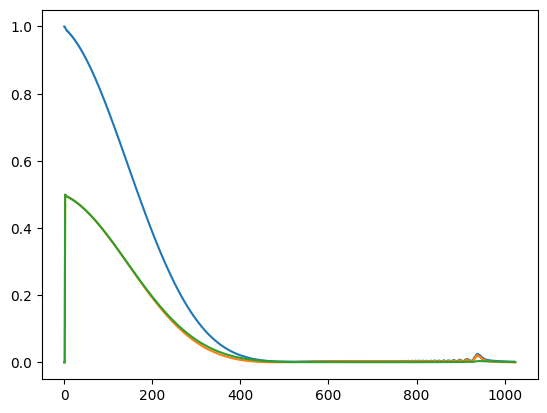

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4a6c006200>

In [54]:
plot(alm2cl(alm[1])/maximum(alm2cl(alm[1])))
plot(alm2cl(alm[2])/maximum(alm2cl(alm[1])))
plot(alm2cl(alm[3])/maximum(alm2cl(alm[1])))